In [3]:
import os
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

# Read csv file

In [4]:
EMO_UNICODE = {
    u':1st_place_medal:': u'\U0001F947',
    # ...
    u':Åland_Islands:': u'\U0001F1E6 \U0001F1FD',
}

UNICODE_EMO = {v: k for k, v in EMO_UNICODE.items()}

In [5]:
DATA_PATH = '../크롤링/data/'
filepath = "omniscient-reader_Episode_en_24.csv"
df = pd.read_csv(DATA_PATH+filepath)
df.head()

,Episode,Date,Review
0,24,"Oct 19, 2020",I'm happy with this twist. I'm sick of charact...
1,24,"Oct 19, 2020",I’m really interested to see Dokja’s developem...
2,24,"Oct 19, 2020",The people: “sharing is caring!” Dokja: I don’...
3,24,"Oct 19, 2020","Finally, a MC that makes the most optimal choi..."
4,24,"Oct 19, 2020","For real though, aside from the people Dokja o..."


# Review를 "하나의 스트링"으로 저장

In [8]:
DATA_PATH = '../크롤링/data/'
filepath = "omniscient-reader_Episode_en_24.csv"
df = pd.read_csv(DATA_PATH+filepath)
df.head()

,Episode,Date,Review
0,24,"Oct 19, 2020",I'm happy with this twist. I'm sick of charact...
1,24,"Oct 19, 2020",I’m really interested to see Dokja’s developem...
2,24,"Oct 19, 2020",The people: “sharing is caring!” Dokja: I don’...
3,24,"Oct 19, 2020","Finally, a MC that makes the most optimal choi..."
4,24,"Oct 19, 2020","For real though, aside from the people Dokja o..."


In [9]:
# 하나의 스트링
df['Review'].values
doc = ''.join(df['Review'].values)

# 텍스트 파일로 임시 저장
filepath = "omniscient-reader_Episode_en_24.txt"
f = open(DATA_PATH + filepath, 'w')
f.write(doc)
f.close()

In [10]:
# 다시 읽어보기
filepath = "omniscient-reader_Episode_en_24.txt"
f = open(DATA_PATH + filepath, 'r')
doc1 = f.read()
f.close()
print(doc1[:1000])

I'm happy with this twist. I'm sick of characters who try so hard to stick to the moral high ground. I’m really interested to see Dokja’s developement at this point since he’s clearly not going to be a ‘good’ character. I don’t think he’ll be straight up evil but I’m excited to see the extent of his neutrality at the very least. The people: “sharing is caring!” Dokja: I don’t care 🤷‍♂️ Edit: just to clarify, I don’t disagree with Dokja’s decision, I just thought it was funny how people were trying to get him to maintain a high “moral ground” but he was just like, nah, this an apocalypse my dudesFinally, a MC that makes the most optimal choice. I've been getting bored of MC's always trying to be the hero.For real though, aside from the people Dokja originally saved with the bugs, everyone is a murderer. They have a lot of audacity to be begging for their lives. I’m down with Dokja’s pragmatismWait I just noticed. Look at the panel when Dokja cuts the guys arms, you see that he is facing

# 영어 전처리

# 크롤링한 데이터이므로 HTML TAG 제거

In [11]:
doc2 = BeautifulSoup(doc1, 'html.parser').get_text() # .text
print(doc2[:1000])

I'm happy with this twist. I'm sick of characters who try so hard to stick to the moral high ground. I’m really interested to see Dokja’s developement at this point since he’s clearly not going to be a ‘good’ character. I don’t think he’ll be straight up evil but I’m excited to see the extent of his neutrality at the very least. The people: “sharing is caring!” Dokja: I don’t care 🤷‍♂️ Edit: just to clarify, I don’t disagree with Dokja’s decision, I just thought it was funny how people were trying to get him to maintain a high “moral ground” but he was just like, nah, this an apocalypse my dudesFinally, a MC that makes the most optimal choice. I've been getting bored of MC's always trying to be the hero.For real though, aside from the people Dokja originally saved with the bugs, everyone is a murderer. They have a lot of audacity to be begging for their lives. I’m down with Dokja’s pragmatismWait I just noticed. Look at the panel when Dokja cuts the guys arms, you see that he is facing

# 영문자만 제외하고 남은 기호, 영문자 아닌 다른 문자를 확인
- emoji
- punctuation ( 줄임말에 사용되는 apostrophe ' 는 생략하면 안 된다.)
- 숫자
- 괄호
- 일본어 ツ
- 중국어 的笑容 都没你的甜 八月正午的阳光

In [12]:
def check_others(doc):
    import re
    pattern = re.compile(r'[a-zA-Z]') # 영문자만 가진 패턴 객체 생성
    others = pattern.sub('', doc) #  # 영문자만 가진 패턴을 삭제한 나머지
    return others

print(check_others(doc2))

'    . '              . ’     ’      ’       ‘’ .  ’  ’      ’            .  : “  !” :  ’  🤷‍♂️ :   ,  ’   ’ ,                  “ ”     , ,     ,        . '     '      .  ,          ,    .            . ’   ’    .          ,          .      ,                          .            ,  ,            .           .            ’         -   . ’         ’      ,      ,    .   ,    . :):  !!!: ?
: , ’       .
:  **
: *  *         “”    '        8        ?:    . :        ;)"  " : "     '  "               :    .:        .                     '  ?         .                           '  .              .  '    //         .         ""                     .   '   '     .                         .    '  100              .     ,           ?  '             ,         .           ,               ,      .             ,          .    7   .     .8         ' .     .               .             .       [        ] [    5 ]                                          .        ’     .    ,       . ,       ,  ,        

# 대문자를 소문자로 변환( NONE OF THESE PEOPLE TRIED) 
# 빈도 분석에서는 I'm(i'm) 은 불용어로 처리될 것이라 상관없다.

In [15]:
def convert_to_lower(doc):
    # I'm 만 제외하고 
    return doc.capitalize() # doc.lower()

doc3 = convert_to_lower(doc2)
print(doc3)

I'm happy with this twist. i'm sick of characters who try so hard to stick to the moral high ground. i’m really interested to see dokja’s developement at this point since he’s clearly not going to be a ‘good’ character. i don’t think he’ll be straight up evil but i’m excited to see the extent of his neutrality at the very least. the people: “sharing is caring!” dokja: i don’t care 🤷‍♂️ edit: just to clarify, i don’t disagree with dokja’s decision, i just thought it was funny how people were trying to get him to maintain a high “moral ground” but he was just like, nah, this an apocalypse my dudesfinally, a mc that makes the most optimal choice. i've been getting bored of mc's always trying to be the hero.for real though, aside from the people dokja originally saved with the bugs, everyone is a murderer. they have a lot of audacity to be begging for their lives. i’m down with dokja’s pragmatismwait i just noticed. look at the panel when dokja cuts the guys arms, you see that he is facing

# 어퍼스트로피를 포함한 punctuation 사전을 사용하지 않기 위해서 정규식 사용하여 기호 삭제

In [16]:
def remove_punctuation(doc):
    import re
    
    # 구두점 제거 
    s = re.sub(r'[.,"\'-?:!;\n\t\r]', '', doc)
    
    # 괄호 제거    
    pattern = r'\([^)]*\)'  # ()   \(   [^)]*   \)  
    s = re.sub(pattern=pattern, repl='', string=s)

    pattern = r'\[[^]]*\]'  # []   \[   [^)]*  \]
    s = re.sub(pattern=pattern, repl='', string=s)

    pattern = r'\<[^>]*\>'  # <>   \<   [^)]*   \>
    s = re.sub(pattern=pattern, repl='', string=s)

    pattern = r'\{[^}]*\}'  # {}   \{   [^)]*   \}
    s = re.sub(pattern=pattern, repl='', string=s)
  
    return s

doc4 = remove_punctuation(doc3)
print(doc4)

Im happy with this twist im sick of characters who try so hard to stick to the moral high ground i’m really interested to see dokja’s developement at this point since he’s clearly not going to be a ‘good’ character i don’t think he’ll be straight up evil but i’m excited to see the extent of his neutrality at the very least the people “sharing is caring” dokja i don’t care 🤷‍♂️ edit just to clarify i don’t disagree with dokja’s decision i just thought it was funny how people were trying to get him to maintain a high “moral ground” but he was just like nah this an apocalypse my dudesfinally a mc that makes the most optimal choice ive been getting bored of mcs always trying to be the herofor real though aside from the people dokja originally saved with the bugs everyone is a murderer they have a lot of audacity to be begging for their lives i’m down with dokja’s pragmatismwait i just noticed look at the panel when dokja cuts the guys arms you see that he is facing away from his group then

#  반복어 삭제(LESHGOOOOO -> LESHGOO)

In [17]:
# from soynlp.normalizer import *
def remove_repeat_characters(doc):
    import soynlp.normalizer
    
    s = soynlp.normalizer. repeat_normalize(doc, num_repeats=2)
    return s
doc5 = remove_repeat_characters(doc4)
print(doc5)

Im happy with this twist im sick of characters who try so hard to stick to the moral high ground i’m really interested to see dokja’s developement at this point since he’s clearly not going to be a ‘good’ character i don’t think he’ll be straight up evil but i’m excited to see the extent of his neutrality at the very least the people “sharing is caring” dokja i don’t care 🤷‍♂️ edit just to clarify i don’t disagree with dokja’s decision i just thought it was funny how people were trying to get him to maintain a high “moral ground” but he was just like nah this an apocalypse my dudesfinally a mc that makes the most optimal choice ive been getting bored of mcs always trying to be the herofor real though aside from the people dokja originally saved with the bugs everyone is a murderer they have a lot of audacity to be begging for their lives i’m down with dokja’s pragmatismwait i just noticed look at the panel when dokja cuts the guys arms you see that he is facing away from his group then

# 인코딩/디코딩 방식을 사용하여 영어만 남기고, 기타 언어들 제거
# 이모티콘도 삭제됨

In [18]:
def clean_other_languages(doc):
    result = doc.encode('utf-8').decode('ascii', 'ignore') 
    return result

doc6 = clean_other_languages(doc5)
print(doc6)

Im happy with this twist im sick of characters who try so hard to stick to the moral high ground im really interested to see dokjas developement at this point since hes clearly not going to be a good character i dont think hell be straight up evil but im excited to see the extent of his neutrality at the very least the people sharing is caring dokja i dont care  edit just to clarify i dont disagree with dokjas decision i just thought it was funny how people were trying to get him to maintain a high moral ground but he was just like nah this an apocalypse my dudesfinally a mc that makes the most optimal choice ive been getting bored of mcs always trying to be the herofor real though aside from the people dokja originally saved with the bugs everyone is a murderer they have a lot of audacity to be begging for their lives im down with dokjas pragmatismwait i just noticed look at the panel when dokja cuts the guys arms you see that he is facing away from his group then look at the last pan

# Converting Emojis to Text
# https://www.kaggle.com/code/sudalairajkumar/getting-started-with-text-preprocessing/notebook
# https://github.com/NeelShah18/emot
# pip install emot --upgrade

In [86]:
# def convert_emojis(text):
#     for emot in UNICODE_EMO:
#         text = re.sub(r'('+emot+')', "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()), text)
#     return text

# doc6 = convert_emojis(doc5)
# print(doc6)

Im happy with this twist im sick of characters who try so hard to stick to the moral high ground i’m really interested to see dokja’s developement at this point since he’s clearly not going to be a ‘good’ character i don’t think he’ll be straight up evil but i’m excited to see the extent of his neutrality at the very least the people “sharing is caring” dokja i don’t care person_shrugging‍male_sign️ edit just to clarify i don’t disagree with dokja’s decision i just thought it was funny how people were trying to get him to maintain a high “moral ground” but he was just like nah this an apocalypse my dudesfinally a mc that makes the most optimal choice ive been getting bored of mcs always trying to be the herofor real though aside from the people dokja originally saved with the bugs everyone is a murderer they have a lot of audacity to be begging for their lives i’m down with dokja’s pragmatismwait i just noticed look at the panel when dokja cuts the guys arms you see that he is facing a

# nltk 이용한 토큰화

In [19]:
from nltk.tokenize import word_tokenize
clean_tokens = word_tokenize(doc6)
clean_tokens[:10]

['Im',
 'happy',
 'with',
 'this',
 'twist',
 'im',
 'sick',
 'of',
 'characters',
 'who']

# 불용어 제거 + 토큰화

In [20]:
def remove_stopwords(doc):
    from nltk.corpus import stopwords 
    from nltk.tokenize import word_tokenize 

    stop_words = set(stopwords.words('english')) 

    word_tokens = word_tokenize(doc)

    result = []
    for w in word_tokens: 
        if w not in stop_words: 
            result.append(w)
    return result

doc7 = remove_stopwords(doc6)
print(doc7)

['Im', 'happy', 'twist', 'im', 'sick', 'characters', 'try', 'hard', 'stick', 'moral', 'high', 'ground', 'im', 'really', 'interested', 'see', 'dokjas', 'developement', 'point', 'since', 'hes', 'clearly', 'going', 'good', 'character', 'dont', 'think', 'hell', 'straight', 'evil', 'im', 'excited', 'see', 'extent', 'neutrality', 'least', 'people', 'sharing', 'caring', 'dokja', 'dont', 'care', 'edit', 'clarify', 'dont', 'disagree', 'dokjas', 'decision', 'thought', 'funny', 'people', 'trying', 'get', 'maintain', 'high', 'moral', 'ground', 'like', 'nah', 'apocalypse', 'dudesfinally', 'mc', 'makes', 'optimal', 'choice', 'ive', 'getting', 'bored', 'mcs', 'always', 'trying', 'herofor', 'real', 'though', 'aside', 'people', 'dokja', 'originally', 'saved', 'bugs', 'everyone', 'murderer', 'lot', 'audacity', 'begging', 'lives', 'im', 'dokjas', 'pragmatismwait', 'noticed', 'look', 'panel', 'dokja', 'cuts', 'guys', 'arms', 'see', 'facing', 'away', 'group', 'look', 'last', 'panel', 'see', 'back', 'turned

# nltk.FreqDist를 이용한 빈도 순위

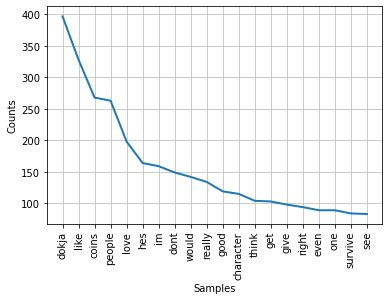

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [37]:
import nltk
fd=nltk.FreqDist(doc7)
fd.plot(20, cumulative=False)

In [25]:
most_common_list = fd.most_common(10)
most_common_list

[('dokja', 397),
 ('like', 328),
 ('coins', 268),
 ('people', 263),
 ('love', 198),
 ('hes', 164),
 ('im', 159),
 ('dont', 149),
 ('would', 142),
 ('really', 134)]

# wordcloud 이용한 빈도 순위 보여주기

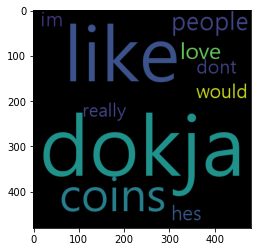

In [26]:
def draw_wordcloud(dict_word_cnt):
    from wordcloud import WordCloud
    wc = WordCloud(font_path='malgun', width=480, height=480, background_color='black')
    gen = wc.generate_from_frequencies(dict_word_cnt)
    plt.figure()
    plt.imshow(gen)
    wc.to_file("most_common_100.png")

draw_wordcloud(dict(most_common_list))

In [50]:
words

['Im',
 'happy',
 'with',
 'this',
 'twist',
 'im',
 'sick',
 'of',
 'characters',
 'who',
 'try',
 'so',
 'hard',
 'to',
 'stick',
 'to',
 'the',
 'moral',
 'high',
 'ground',
 'im',
 'really',
 'interested',
 'to',
 'see',
 'dokjas',
 'developement',
 'at',
 'this',
 'point',
 'since',
 'hes',
 'clearly',
 'not',
 'going',
 'to',
 'be',
 'a',
 'good',
 'character',
 'i',
 'dont',
 'think',
 'hell',
 'be',
 'straight',
 'up',
 'evil',
 'but',
 'im',
 'excited',
 'to',
 'see',
 'the',
 'extent',
 'of',
 'his',
 'neutrality',
 'at',
 'the',
 'very',
 'least',
 'the',
 'people',
 'sharing',
 'is',
 'caring',
 'dokja',
 'i',
 'dont',
 'care',
 'edit',
 'just',
 'to',
 'clarify',
 'i',
 'dont',
 'disagree',
 'with',
 'dokjas',
 'decision',
 'i',
 'just',
 'thought',
 'it',
 'was',
 'funny',
 'how',
 'people',
 'were',
 'trying',
 'to',
 'get',
 'him',
 'to',
 'maintain',
 'a',
 'high',
 'moral',
 'ground',
 'but',
 'he',
 'was',
 'just',
 'like',
 'nah',
 'this',
 'an',
 'apocalypse',
 'my

In [58]:
from nltk.corpus import stopwords  

stopwords.fileids()
english_stops = set(stopwords.words('english'))
tokens = [word for word in words if word not in english_stops]
tokens

['Im',
 'happy',
 'twist',
 'im',
 'sick',
 'characters',
 'try',
 'hard',
 'stick',
 'moral',
 'high',
 'ground',
 'im',
 'really',
 'interested',
 'see',
 'dokjas',
 'developement',
 'point',
 'since',
 'hes',
 'clearly',
 'going',
 'good',
 'character',
 'dont',
 'think',
 'hell',
 'straight',
 'evil',
 'im',
 'excited',
 'see',
 'extent',
 'neutrality',
 'least',
 'people',
 'sharing',
 'caring',
 'dokja',
 'dont',
 'care',
 'edit',
 'clarify',
 'dont',
 'disagree',
 'dokjas',
 'decision',
 'thought',
 'funny',
 'people',
 'trying',
 'get',
 'maintain',
 'high',
 'moral',
 'ground',
 'like',
 'nah',
 'apocalypse',
 'dudesfinally',
 'mc',
 'makes',
 'optimal',
 'choice',
 'ive',
 'getting',
 'bored',
 'mcs',
 'always',
 'trying',
 'herofor',
 'real',
 'though',
 'aside',
 'people',
 'dokja',
 'originally',
 'saved',
 'bugs',
 'everyone',
 'murderer',
 'lot',
 'audacity',
 'begging',
 'lives',
 'im',
 'dokjas',
 'pragmatismwait',
 'noticed',
 'look',
 'panel',
 'dokja',
 'cuts',
 'gu

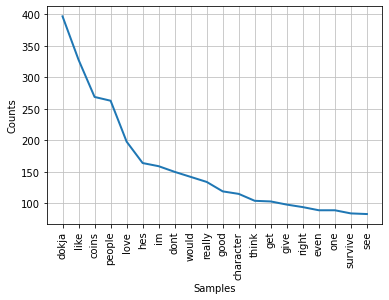

In [57]:
from nltk import Text

from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
#words = retokenize.tokenize(doc6)
#text = Text(retokenize.tokenize(doc6))
text = Text(tokens)
text.plot(20)
plt.show()

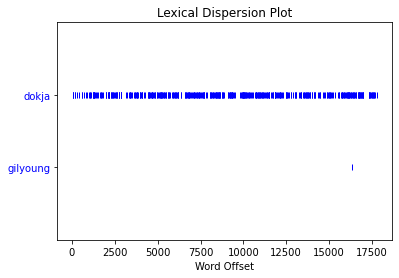

In [59]:
# dispersion_plot 메서드는 단어가 사용된 위치를 시각화한다. 
# 각 등장인물에 대해 적용하면 다음과 같은 결과를 얻는다.

"""
김독자
전지적 독자시점의 주인공. 자세한 내용은 해당 문서 참고.
유상아
독자의 회사 동료. 퇴근길 전철에서 독자와 얘기하다 세상의 변화에 말려든다. 자세한 내용은 해당 문서 참고.
이길영
독자와 지하철을 같이 타고있던 소년. 자세한 내용은 해당 문서 참고.
한명오
독자의 회사 상사. 유상아를 노리고 퇴근길 전철에 탔다가 세상의 변화에 말려든다. 자세한 내용은 해당 문서 참고.
한수영
독자처럼 멸살법의 지식을 토대로 암약한다. 자세한 내용은 해당 문서 참고.

"""
text.dispersion_plot(["dokja", "gilyoung"])

In [60]:
# concordance 메서드로 단어가 사용된 위치를 직접 표시하면 문맥(context)이 어떤지 볼 수 있다. 
# 여기에서 문맥은 해당 단어의 앞과 뒤에 사용된 단어를 뜻한다.

text.concordance("Dokja")

Displaying 25 of 397 matches:
utrality least people sharing caring dokja dont care edit clarify dont disagree
ing herofor real though aside people dokja originally saved bugs everyone murde
as pragmatismwait noticed look panel dokja cuts guys arms see facing away group
cursed guy suit hascrowd give refund dokja sorry refund policy give us coins do
ja sorry refund policy give us coins dokja missed part thats problem webtoon al
orld order mean couldnt muster coins dokja gets much gift constellations timeth
il survival survivals sakedokja also dokja believe omniscient reader otherwise 
ooks lives insects anyones curiousis dokja get hotter passing episode love look
ss whether sharing coins moral thing dokja letting manipulated better long run 
ke lawful chaotic moral compassi see dokja survivor good bad trying livefinally
y beg even coins itd waste hopefully dokja mentions boss mans moniesalso love g
d stand themselvesi love author sets dokja apart inho says return coins people 
 trust you

In [61]:
text.concordance("gilyoung")

Displaying 1 of 1 matches:
nt others help never help others f gilyoung becomes master insects futurewow d


# 빈도 분석

In [85]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [86]:
import keras
keras.__version__

'2.10.0'

In [87]:
import gensim
gensim.__version__

'4.2.0'

In [88]:
import sklearn
sklearn.__version__

'1.1.2'

In [89]:
import nltk
nltk.__version__

'3.6.1'

In [90]:
import konlpy
konlpy.__version__

'0.6.0'